In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
path = r'C:\Users\Ben\Desktop\Data Science\Kaggle\Advanced House Price Prediction\Preprocessed_data\mean_encoded.csv'

In [5]:
raw_df = pd.read_csv(path)

In [6]:
raw_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_me,Street_me,Alley_me,LotShape_me,LandContour_me,Utilities_me,LotConfig_me,LandSlope_me,Neighborhood_me,Condition1_me,Condition2_me,BldgType_me,HouseStyle_me,RoofStyle_me,RoofMatl_me,Exterior1st_me,Exterior2nd_me,MasVnrType_me,ExterQual_me,ExterCond_me,Foundation_me,BsmtQual_me,BsmtCond_me,BsmtExposure_me,BsmtFinType1_me,BsmtFinType2_me,Heating_me,HeatingQC_me,CentralAir_me,Electrical_me,KitchenQual_me,Functional_me,FireplaceQu_me,GarageType_me,GarageFinish_me,GarageQual_me,GarageCond_me,PavedDrive_me,PoolQC_me,Fence_me,MiscFeature_me,SaleType_me,SaleCondition_me
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,191004.995,181130.539,183452.131,164754.818,180183.747,180950.957,176938.048,179956.8,197965.773,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,165652.296,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,141331.483,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.410,173401.837,175202.220
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,191004.995,181130.539,183452.131,164754.818,180183.747,180950.957,177934.574,179956.8,238772.727,142475.481,181169.406,185763.807,175985.478,171483.956,179803.679,149422.177,149803.173,156958.243,144341.313,184034.896,149805.715,202688.479,183632.621,257689.806,161573.068,184694.69,182021.195,214914.429,186186.71,186810.637,139962.512,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.410,173401.837,175202.220
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,176938.048,179956.8,197965.773,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,192789.658,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.410,173401.837,175202.220
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,181623.426,179956.8,210624.725,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,149841.646,161328.947,156958.243,144341.313,184034.896,132291.075,140759.818,213599.908,165652.296,161573.068,184694.69,182021.195,156858.871,186186.71,186810.637,212116.024,183429.147,226351.416,134091.163,142156.423,187489.836,187885.735,186433.974,180404.663,187596.838,182046.410,173401.837,146526.624
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,177934.574,179956.8,335295.317,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,206643.421,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.410,173401.837,175202.220
5,50,85.0,14115,5,5,1

In [7]:
raw_df.shape

(2919, 79)

## Features with very high top appearence

In [23]:
df = raw_df.copy()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.000,20.000,50.000,70.000,190.000
LotFrontage,2919.0,69.099349,21.321241,21.000,60.000,69.000,78.000,313.000
LotArea,2919.0,10168.114080,7886.996359,1300.000,7478.000,9453.000,11570.000,215245.000
OverallQual,2919.0,6.089072,1.409947,1.000,5.000,6.000,7.000,10.000
OverallCond,2919.0,5.564577,1.113131,1.000,5.000,5.000,6.000,9.000
YearBuilt,2919.0,1971.312778,30.291442,1872.000,1953.500,1973.000,2001.000,2010.000
YearRemodAdd,2919.0,1984.264474,20.894344,1950.000,1965.000,1993.000,2004.000,2010.000
MasVnrArea,2919.0,101.396026,178.854579,0.000,0.000,0.000,163.500,1600.000
BsmtFinSF1,2919.0,441.392086,455.535859,0.000,0.000,368.000,733.000,5644.000
BsmtFinSF2,2919.0,49.565262,169.179104,0.000,0.000,0.000,0.000,1526.000


In [8]:
df_train = raw_df.iloc[:1460, :]
df_test = raw_df.iloc[1460:, :]

In [9]:
print(df_train.shape)
print(df_test.shape)

(1460, 79)
(1459, 79)


## Gaussian transformation of the target

In [10]:
train_path = r'C:\Users\Ben\Desktop\Data Science\Kaggle\Advanced House Price Prediction\Data\train.csv'
df_train_with_target = pd.read_csv(train_path)

In [11]:
df_train_with_target.shape

(1460, 81)

In [12]:
df_train_with_target.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df_train['SalePrice'] = df_train_with_target['SalePrice']


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 0.98, 'Before transformation')

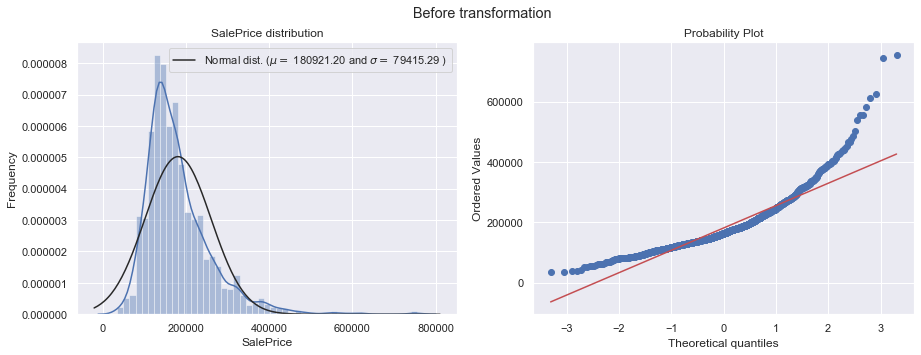

In [14]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

In [15]:
# Apply transformation
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


 mu = 12.02 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

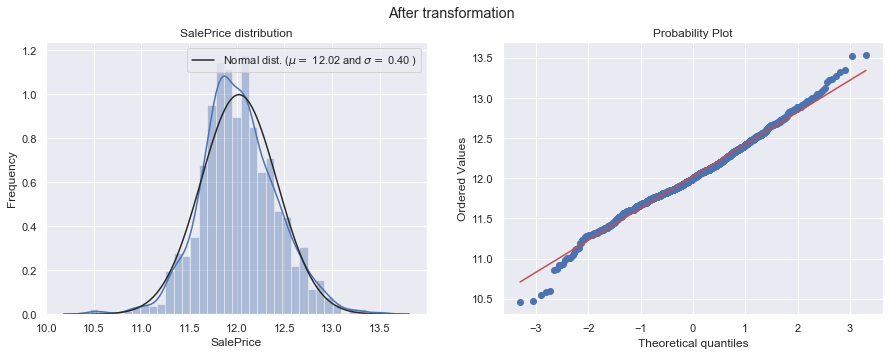

In [16]:
# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

Credits [Beginner House prices EDA](https://www.kaggle.com/shaygu/beginner-house-prices-eda)

In [17]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_me,Street_me,Alley_me,LotShape_me,LandContour_me,Utilities_me,LotConfig_me,LandSlope_me,Neighborhood_me,Condition1_me,Condition2_me,BldgType_me,HouseStyle_me,RoofStyle_me,RoofMatl_me,Exterior1st_me,Exterior2nd_me,MasVnrType_me,ExterQual_me,ExterCond_me,Foundation_me,BsmtQual_me,BsmtCond_me,BsmtExposure_me,BsmtFinType1_me,BsmtFinType2_me,Heating_me,HeatingQC_me,CentralAir_me,Electrical_me,KitchenQual_me,Functional_me,FireplaceQu_me,GarageType_me,GarageFinish_me,GarageQual_me,GarageCond_me,PavedDrive_me,PoolQC_me,Fence_me,MiscFeature_me,SaleType_me,SaleCondition_me,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,191004.995,181130.539,183452.131,164754.818,180183.747,180950.957,176938.048,179956.8,197965.773,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,165652.296,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,141331.483,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,175202.220,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,191004.995,181130.539,183452.131,164754.818,180183.747,180950.957,177934.574,179956.8,238772.727,142475.481,181169.406,185763.807,175985.478,171483.956,179803.679,149422.177,149803.173,156958.243,144341.313,184034.896,149805.715,202688.479,183632.621,257689.806,161573.068,184694.69,182021.195,214914.429,186186.71,186810.637,139962.512,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,175202.220,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,176938.048,179956.8,197965.773,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,192789.658,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,175202.220,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,181623.426,179956.8,210624.725,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,149841.646,161328.947,156958.243,144341.313,184034.896,132291.075,140759.818,213599.908,165652.296,161573.068,184694.69,182021.195,156858.871,186186.71,186810.637,212116.024,183429.147,226351.416,134091.163,142156.423,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,146526.624,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,177934.574,179956.8,335295.317,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,231633.510,184034.896,225230.442,202688.479,183632.621,206643.421,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,205723.489,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.4

In [18]:
df_train.shape

(1460, 80)

In [19]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_me,Street_me,Alley_me,LotShape_me,LandContour_me,Utilities_me,LotConfig_me,LandSlope_me,Neighborhood_me,Condition1_me,Condition2_me,BldgType_me,HouseStyle_me,RoofStyle_me,RoofMatl_me,Exterior1st_me,Exterior2nd_me,MasVnrType_me,ExterQual_me,ExterCond_me,Foundation_me,BsmtQual_me,BsmtCond_me,BsmtExposure_me,BsmtFinType1_me,BsmtFinType2_me,Heating_me,HeatingQC_me,CentralAir_me,Electrical_me,KitchenQual_me,Functional_me,FireplaceQu_me,GarageType_me,GarageFinish_me,GarageQual_me,GarageCond_me,PavedDrive_me,PoolQC_me,Fence_me,MiscFeature_me,SaleType_me,SaleCondition_me
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,131558.375,181130.539,183452.131,164754.818,180183.747,180950.957,176938.048,179956.8,145847.080,142475.481,181169.406,185763.807,175985.478,171483.956,179803.679,213732.901,214432.460,156958.243,144341.313,184034.896,149805.715,140759.818,183632.621,165652.296,146889.248,164364.13,182021.195,142362.876,186186.71,186810.637,139962.512,183429.147,141331.483,202892.656,142156.423,187489.836,187885.735,186433.974,180404.663,148751.089,182046.41,173401.837,175202.22
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,181623.426,179956.8,145847.080,184495.492,181169.406,185763.807,175985.478,218876.934,179803.679,149841.646,148386.066,204691.872,144341.313,184034.896,149805.715,140759.818,183632.621,165652.296,161573.068,184694.69,182021.195,142362.876,186186.71,186810.637,212116.024,183429.147,141331.483,202892.656,142156.423,187489.836,187885.735,186433.974,180404.663,187596.838,170750.00,173401.837,175202.22
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,176938.048,179956.8,192854.506,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,156958.243,144341.313,184034.896,225230.442,202688.479,183632.621,165652.296,235413.720,184694.69,182021.195,156858.871,186186.71,186810.637,139962.512,183429.147,205723.489,202892.656,240052.690,187489.836,187885.735,186433.974,180404.663,148751.089,182046.41,173401.837,175202.22
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,191004.995,181130.539,183452.131,206101.665,180183.747,180950.957,176938.048,179956.8,192854.506,184495.492,181169.406,185763.807,210051.764,171483.956,179803.679,213732.901,214432.460,204691.872,144341.313,184034.896,225230.442,140759.818,183632.621,165652.296,235413.720,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,226351.416,202892.656,240052.690,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,175202.22
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,191004.995,181130.539,183452.131,206101.665,231533.940,180950.957,176938.048,179956.8,310499.000,184495.492,181169.406,181959.342,175985.478,171483.956,179803.679,163077.450,167661.565,156958.243,231633.510,184034.896,225230.442,202688.479,183632.621,165652.296,161573.068,184694.69,182021.195,214914.429,186186.71,186810.637,212116.024,183429.147,141331.483,202892.656,202068.870,187489.836,187885.735,186433.974,180404.663,187596.838,182046.41,173401.837,175202.22


In [20]:
df_test.shape

(1459, 79)

In [21]:
df_train.to_csv(r'C:\Users\Ben\Desktop\Data Science\Kaggle\Advanced House Price Prediction\Preprocessed_data\preprocessed_train.csv', index = False)

In [22]:
df_test.to_csv(r'C:\Users\Ben\Desktop\Data Science\Kaggle\Advanced House Price Prediction\Preprocessed_data\preprocessed_test.csv', index = False)